# Training a model with a curated image dataset in fastai with DataBlock variations
Walkthrough of how to train a deep learning model in fastai with a curated image dataset incorporating variations based on using DataBlocks to define the data


In [40]:
# imports for notebook boilerplate
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *
modifier = 'jun9_2021'

In [41]:
# set up the notebook for fast.ai
fastbook.setup_book()

# Ingest the dataset
- create a path object
- defined an ImageDataLoaders object

In [42]:
# ingest the curated image dataset CIFAR
path = untar_data(URLs.CIFAR)

In [43]:
path

Path('/storage/data/cifar10')

In [44]:
# examine the directory structure of the dataset
path.ls()

(#3) [Path('/storage/data/cifar10/train'),Path('/storage/data/cifar10/labels.txt'),Path('/storage/data/cifar10/test')]

# Define a DataBlock

In [45]:
# define a DataBlock object
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=parent_label)

In [46]:
dls = db.dataloaders(path/'train',bs=32)

In [47]:
# summary must be run on DataBlock object, not dataloaders object
db.summary(path/"train")

Setting-up type transforms pipelines
Found 50000 items
2 datasets of sizes 40000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying PILBase.create gives
      PILImage mode=RGB size=32x32
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/cifar10/train/truck/3702_truck.png
    applying parent_label gives
      truck
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=32x32, TensorCategory(9))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -- {'div': 255.0, 'div_mask': 1}

Building one batch
Applying item_tfms to the firs

# Examine the dataset

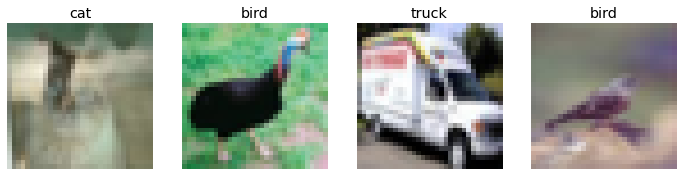

In [48]:
# show a batch of training data
dls.train.show_batch(max_n=4, nrows=1)


In [49]:
# examine the train subdirectory
(path/'train').ls()

(#10) [Path('/storage/data/cifar10/train/horse'),Path('/storage/data/cifar10/train/dog'),Path('/storage/data/cifar10/train/ship'),Path('/storage/data/cifar10/train/frog'),Path('/storage/data/cifar10/train/truck'),Path('/storage/data/cifar10/train/deer'),Path('/storage/data/cifar10/train/airplane'),Path('/storage/data/cifar10/train/automobile'),Path('/storage/data/cifar10/train/cat'),Path('/storage/data/cifar10/train/bird')]

In [50]:
(path/'train/dog').ls()

(#5000) [Path('/storage/data/cifar10/train/dog/26785_dog.png'),Path('/storage/data/cifar10/train/dog/47662_dog.png'),Path('/storage/data/cifar10/train/dog/48730_dog.png'),Path('/storage/data/cifar10/train/dog/40889_dog.png'),Path('/storage/data/cifar10/train/dog/24363_dog.png'),Path('/storage/data/cifar10/train/dog/44046_dog.png'),Path('/storage/data/cifar10/train/dog/26962_dog.png'),Path('/storage/data/cifar10/train/dog/19003_dog.png'),Path('/storage/data/cifar10/train/dog/47416_dog.png'),Path('/storage/data/cifar10/train/dog/31111_dog.png')...]

In [51]:
(path/'train/cat').ls()

(#5000) [Path('/storage/data/cifar10/train/cat/1845_cat.png'),Path('/storage/data/cifar10/train/cat/26087_cat.png'),Path('/storage/data/cifar10/train/cat/24817_cat.png'),Path('/storage/data/cifar10/train/cat/47541_cat.png'),Path('/storage/data/cifar10/train/cat/44852_cat.png'),Path('/storage/data/cifar10/train/cat/37669_cat.png'),Path('/storage/data/cifar10/train/cat/11236_cat.png'),Path('/storage/data/cifar10/train/cat/4329_cat.png'),Path('/storage/data/cifar10/train/cat/44859_cat.png'),Path('/storage/data/cifar10/train/cat/22425_cat.png')...]

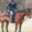

In [52]:
# take a look at one of the images
img_files = get_image_files(path)
img = PILImage.create(img_files[100])
img

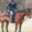

In [53]:
# display a thumbnail of the image
img.to_thumb(180)

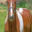

In [54]:
img = PILImage.create(img_files[3000])
img

# Define and train the model

In [55]:
# define the model
learn = cnn_learner(dls, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time
0,1.866130,1.738328,0.443000,01:26


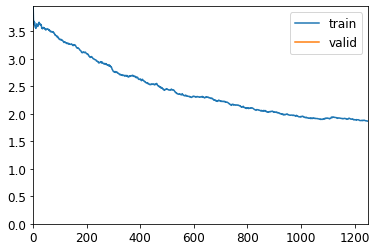

epoch,train_loss,valid_loss,accuracy,time
0,1.295657,1.172368,0.706500,01:43
1,1.137622,1.068100,0.750200,01:43


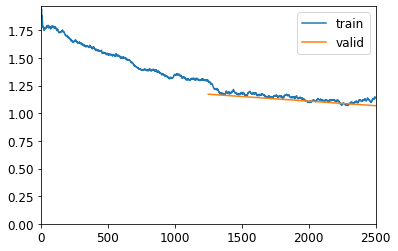

CPU times: user 4min 42s, sys: 6.03 s, total: 4min 49s
Wall time: 4min 53s


In [56]:
%%time
learn.fine_tune(2,cbs=ShowGraphCallback())

In [57]:
learn.summary()

Sequential (Input shape: ['32 x 3 x 32 x 32'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               32 x 64 x 16 x 16    9,408      True      
________________________________________________________________
BatchNorm2d          32 x 64 x 16 x 16    128        True      
________________________________________________________________
ReLU                 32 x 64 x 16 x 16    0          False     
________________________________________________________________
MaxPool2d            32 x 64 x 8 x 8      0          False     
________________________________________________________________
Conv2d               32 x 64 x 8 x 8      36,864     True      
________________________________________________________________
BatchNorm2d          32 x 64 x 8 x 8      128        True      
________________________________________________________________
ReLU                 32 x 64 x 8 x 8      0          False     
___________________________________________________

In [58]:
# save the model using the trick to specify a writeable directory
save_path = learn.path
learn.path = Path('/notebooks/temp/models')
learn.export('cifar_'+modifier+'.pkl')
learn.save('cifar_save_'+modifier)
learn.path = save_path

# Examine the performance of the model


In [59]:
learn.validate()

(#2) [1.0680996179580688,0.7501999735832214]

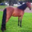

In [60]:
# take a look at one of the test images
img_test_files = get_image_files(path/"test")
img2 = PILImage.create(img_test_files[700])
img2

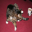

In [61]:
# select an image from the test set
img3 = PILImage.create(img_test_files[8000])
img3

In [62]:
# apply the trained model to the image
learn.predict(img2)

('horse',
 TensorImage(7),
 TensorImage([0.0045, 0.0146, 0.0101, 0.0064, 0.0070, 0.0102, 0.0075, 0.9296, 0.0045, 0.0056]))

In [63]:
# apply the trained model to the image
learn.predict(img3)

('dog',
 TensorImage(5),
 TensorImage([0.0277, 0.0321, 0.0124, 0.3323, 0.0077, 0.5413, 0.0215, 0.0107, 0.0036, 0.0108]))

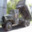

In [64]:
# select an image from the test set
img4 = PILImage.create(img_test_files[4000])
img4

In [65]:
learn.predict(img4)

('truck',
 TensorImage(9),
 TensorImage([0.0153, 0.0262, 0.0162, 0.0475, 0.0117, 0.0198, 0.0102, 0.0144, 0.0305, 0.8083]))

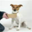

In [66]:
# take a look at a dog image from the training dataset
dog_files = get_image_files(path/"train/dog")
dog_img = PILImage.create(dog_files[30])
dog_img

In [67]:
learn.predict(dog_img)

('dog',
 TensorImage(5),
 TensorImage([0.0292, 0.0095, 0.0275, 0.3680, 0.0174, 0.4903, 0.0256, 0.0086, 0.0114, 0.0124]))

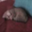

In [68]:
# take a look at a cat image from the training dataset
cat_files = get_image_files(path/"train/cat")
cat_img = PILImage.create(cat_files[30])
cat_img

In [69]:
learn.predict(cat_img)

('cat',
 TensorImage(3),
 TensorImage([0.0320, 0.0188, 0.0387, 0.5071, 0.0081, 0.2066, 0.0329, 0.0372, 0.0104, 0.1081]))

# Examine the top loss examples and confusion matrix

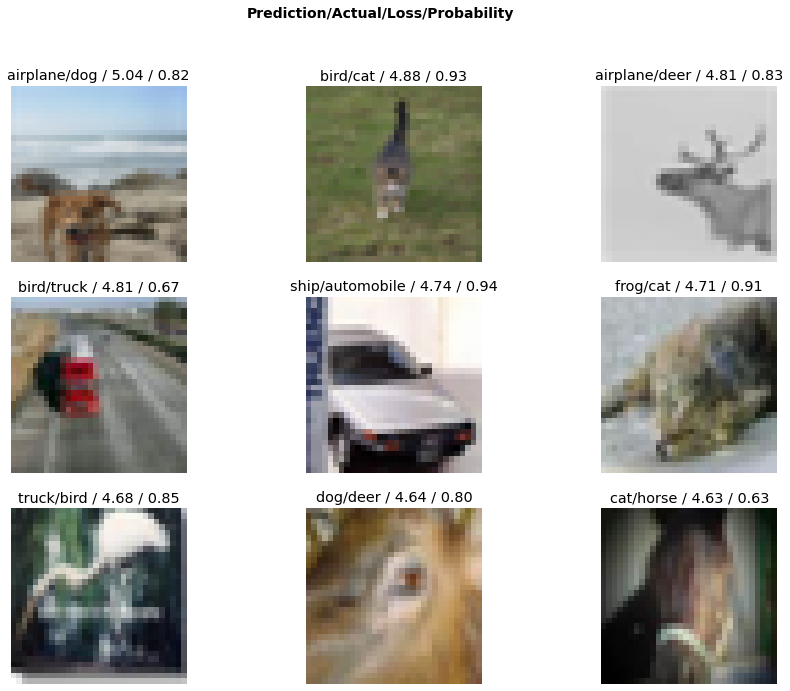

In [70]:
interp = ClassificationInterpretation.from_learner(learn)
# examine the images from the training set with the biggest loss
# losses,idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11))


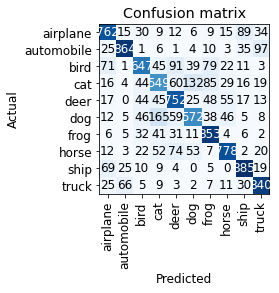

In [71]:
# plot the confusion matrix
interp.plot_confusion_matrix()

# Examine the performance of the model on the test set

In [72]:
# define a dataloader object on the test dataset
dls_test = db.dataloaders(path/'test',bs=32)

In [73]:
# define a learner that uses the dataloader object defined on the test dataset
learn_test = cnn_learner(dls_test, resnet18, 
                    loss_func=LabelSmoothingCrossEntropy(), 
                    metrics=accuracy)

In [74]:
# point the model's path to where the weights were saved and load the weights
learn_test.path = Path('/notebooks/temp/models')
learn_test.load('cifar_save_jun6_2021')

In [75]:
learn_test.validate()

(#2) [1.0432653427124023,0.7565000057220459]

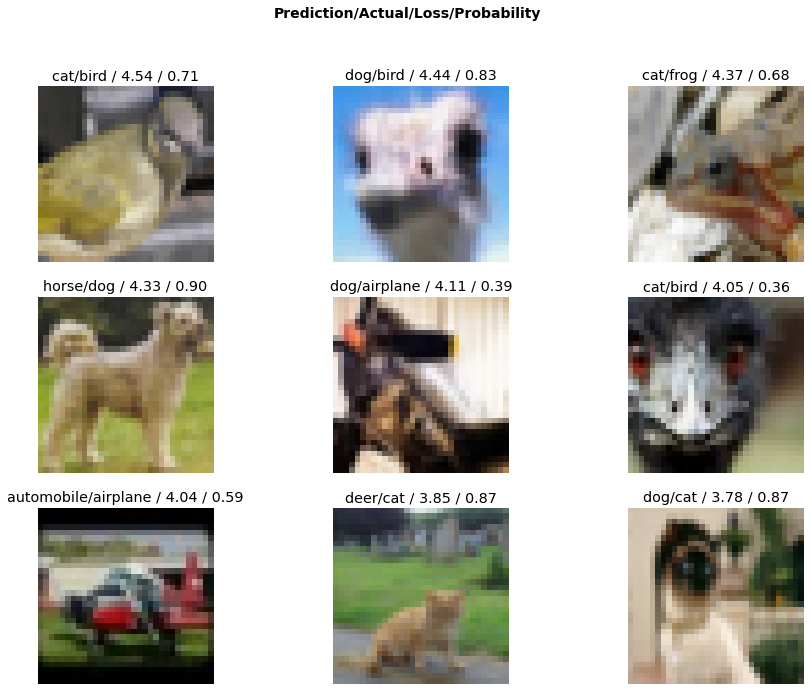

In [76]:
interp_test = ClassificationInterpretation.from_learner(learn_test)
# examine the images from the training set with the biggest loss
losses,idxs = interp_test.top_losses()
interp_test.plot_top_losses(9, figsize=(15,11))

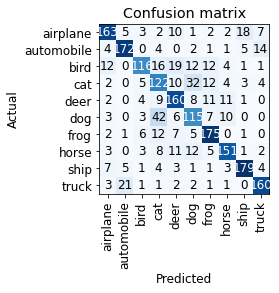

In [77]:
# show confusion matrix for the test dataset
interp_test.plot_confusion_matrix()